<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-1/blob/main/Casidsid%2C_Castillo%2C_Clarito_Activity_7_Performing_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**Activity 7** | **Performing Face Recognition**
**Name** | Casidsid, Judd Amiel
| Castillo, Mark Laurence
| Clarito, Vincent Maverick
**Section** | CPE31S2
**Date Performed**: | 10/14/2023
**Date Submitted**: | 10/14/2023
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0 #counter
  X, y = [], []
  # x is the images
  # y is numbers from counter???

  #many loops to get the files
  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(filepath , cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]


In [ ]:
image_path = 'your_image_directory_path'
csv_file = 'output.csv'

# Load images and labels
X, y = read_images(image_path, csv_file)

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

> Castillo: I was initially confused with the nested for loops for getting the image files since I am not that experienced with the os library.

> Clarito: I still don't fully understand some functions work as well as how to use other modules especially "os".

> Casidsid: I can't fully analyze how the functions work like the os library

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
def face_rec():
  names = ['Friend1', 'Friend2']    # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(sys.argv[1])
  # converts y into array
  y = np.asarray(y, dtype=np.int32)

  #create facial recognition object & train function for FR obj
  model = cv2.face.EigenFaceRecognizer_create()
  #model = cv2.face.createFisherFaceRecognizer()
  #model = cv2.face.createLBPHFaceRecognizer()
  model.train(X, y)

  #enables video camera and cascade for facial detection
  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    #ret = if frame is avaliable
    if not ret:
      break

    #facial detection
    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      # tries for facial recognition
      try:
        #predict function from FR object class
        #params is unknown variable
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**


> It reads images from a specified directory, trains the recognition model, detects faces in real-time video feed, and displays recognized faces with labels, making it a basic yet functional face recognition demo script.


---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

> Castillo: The predict function returns the output of the trained facial recognition object

> Clarito: The two returned values are important because they help in identifying the recognized person and assessing the reliability of the recognition.


## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

haarcascade = 'C:/Users/Mav/Emerging Tech Act/haarcascade_frontalface_default.xml'
path = 'C:/Users/Mav/Emerging Tech Act/Activity 7/Pictures'

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

def face_rec():
  names = ['Laurence','Unrecognize','Clarito']

  [X, y] = read_images(path)
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  #model = cv2.face.FisherFaceRecognizer()
  #model = cv2.face.LBPHFaceRecognizer()

  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(haarcascade)

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()

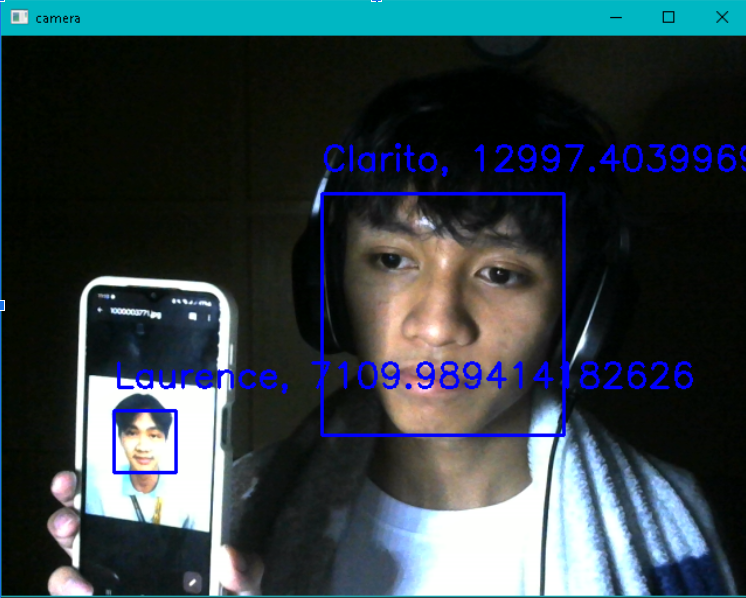

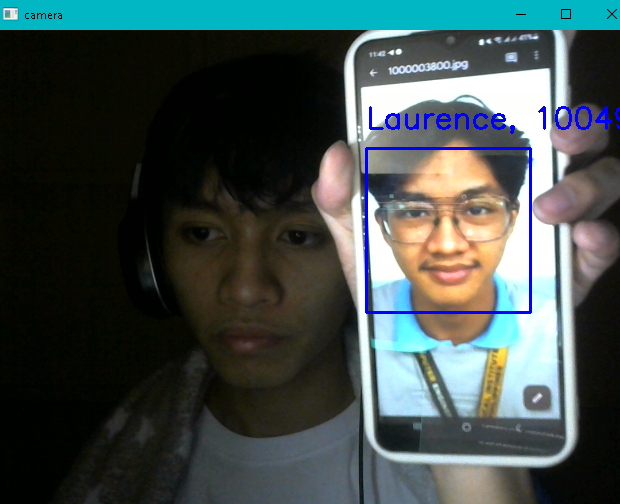

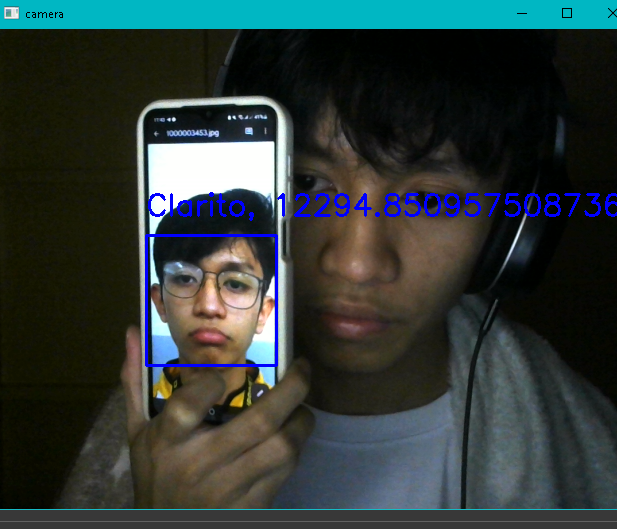

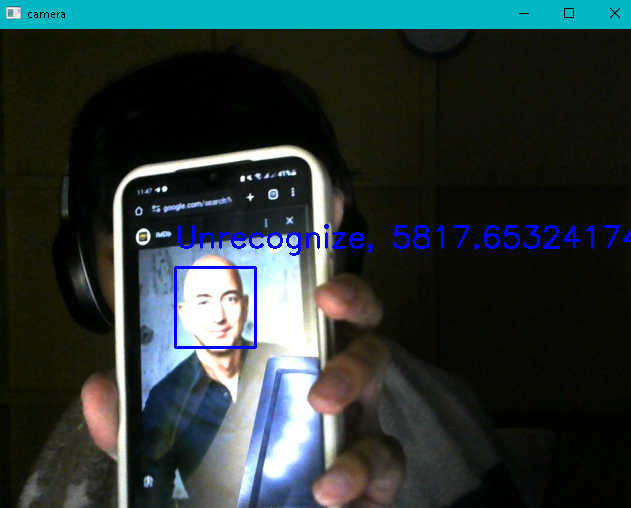

> Castillo: I am still confused and dont know what the value param[1] that follows the name represents.

> Clarito: I noticed that the more pictures you input on your folder, the more accurate it is.

> Casidsid: The more you put pictures, the more accurate the output will be

## 5. Summary, Conclusions and Lessons Learned

> Castillo: In this lesson we added the process of image recognition via imported class objects and functions. The file processing is necessary part of the process to train the image recognition object.

> Clarito: In this activity we learned how to its necessary to organize your images for the facial recognition to recognize the face, for training the facial recognition.

> Casidsid: In conclusion, being capable to recognize and detect faces in Python is a necessary ability for many kinds of uses which includes security systems.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*